In [34]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns

In [35]:
def conection(database):
    connection = create_engine("sqlite:///"+ database).connect()
    return connection
con = conection("db/diamonds_m2.db")

In [36]:
#df done mostly through a query
def query_diamond(query):
    df_diamonds_full = pd.read_sql_query(query,con)
    return df_diamonds_full

query_diamonds_full = '''
SELECT 
    d_prop.index_id,
    d_city.city,
    d_dim.depth,
    d_dim.'table',
    d_dim.x,
    d_dim.y,
    d_dim.z,
    d_cut.cut,
    d_col.color,
    d_clar.clarity,
    d_tran.carat,
    d_tran.price
FROM diamonds_properties as d_prop
    INNER JOIN diamonds_clarity as d_clar ON d_prop.clarity_id = d_clar.clarity_id
    INNER JOIN diamonds_color as d_col ON d_prop.color_id = d_col.color_id
    INNER JOIN diamonds_cut as d_cut ON d_prop.cut_id = d_cut.cut_id
    INNER JOIN diamonds_dimensions as d_dim ON d_prop.index_id = d_dim.index_id
    INNER JOIN diamonds_transactional as d_tran ON d_prop.index_id = d_tran.index_id
    INNER JOIN diamonds_city as d_city ON d_tran.city_id = d_city.city_id
'''

df_diamonds = query_diamond(query_diamonds_full)

In [37]:
#df obtained mostly with pandas
#def pandas_transformation():
#    query_diamonds_dimensions = """SELECT * FROM diamonds_dimensions"""
#    df_diamonds_dimensions = pd.read_sql_query(query_diamonds_dimensions,con)
#    
#    query_diamonds_transactional = """SELECT * FROM diamonds_transactional"""
#    df_diamonds_transactional = pd.read_sql_query(query_diamonds_transactional,con)
#    
#    query_diamonds_properties = """SELECT * FROM diamonds_properties"""
#    df_diamonds_properties = pd.read_sql_query(query_diamonds_properties,con)
#    
#    query_diamonds_cut = """SELECT * FROM diamonds_cut"""
#    df_diamonds_cut = pd.read_sql_query(query_diamonds_cut,con)
#    
#    query_diamonds_color = """SELECT * FROM diamonds_color"""
#    df_diamonds_diamonds_color = pd.read_sql_query(query_diamonds_color,con)
#    
#    query_diamonds_clarity = """SELECT * FROM diamonds_clarity"""
#    df_diamonds_clarity = pd.read_sql_query(query_diamonds_clarity,con)
#    
#    query_diamonds_city = """SELECT * FROM diamonds_city"""
#    df_diamonds_city = pd.read_sql_query(query_diamonds_city,con)
#    
#    query_inner = pd.merge(df_diamonds_dimensions,df_diamonds_transactional, on="index_id")
#    query_inner = pd.merge(query_inner,df_diamonds_properties, on="index_id")
#    query_inner = pd.merge(query_inner, df_diamonds_cut, on="cut_id")
#    query_inner = pd.merge(query_inner,df_diamonds_diamonds_color, on="color_id")
#    query_inner = pd.merge(query_inner,df_diamonds_clarity, on="clarity_id")
#    query_inner = pd.merge(query_inner,df_diamonds_city, on="city_id")
#    
#    df_diamonds = query_inner[["index_id","city","depth","table","x","y","z","price","cut","color","clarity", "carat"]]
#    
#    return df_diamonds
#
#df_diamonds = pandas_transformation()

In [38]:
def enriched(df):
    df["gr"] = round(df["carat"]*0.2,3)
    df["mg"] = round(df["carat"]*200).astype(int)
    df
    return df.sort_values(["city","price"], ascending=[True, False]).reset_index(drop=True)

df_diamonds_enriched = enriched(df_diamonds)

In [39]:
def correlation_diamonds(df_diamonds_enriched):
    df_diamonds_corr = df_diamonds_enriched.corr().reset_index()
    return df_diamonds_corr

df_diamonds_corr = correlation_diamonds(df_diamonds_enriched)

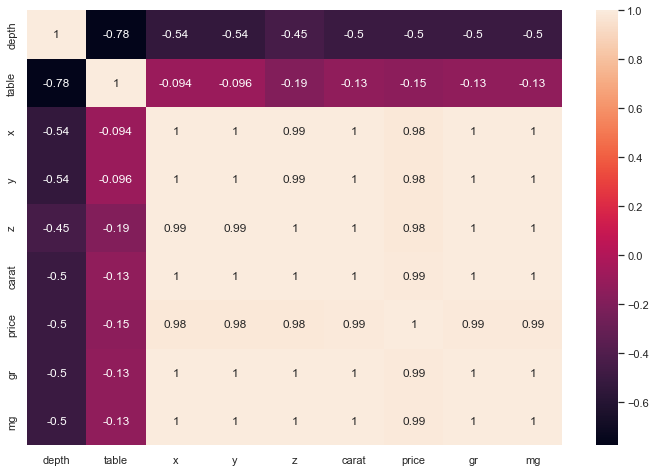

In [63]:
def correlation_visualization(df_diamonds_enriched):
    df_diamonds_corr2 = df_diamonds_enriched.corr()
    sns.set(rc={'figure.figsize':(12,8)})
    return sns.heatmap(df_diamonds_corr2, annot=True);

corr_graf = correlation_visualization(df_diamonds_corr)

In [43]:
def export_files(df_diamonds_enriched, df_diamonds_corr):
    df_diamonds_enriched.to_csv("output_dataset/diamonds_m2.csv", sep=",", index=False)
    df_diamonds_corr.to_csv("output_dataset/diamonds_m2_correlaction.csv", sep=",", index=False)
    return "multiple csv exported successfully"

export_files(df_diamonds_enriched, df_diamonds_corr)

'multiple csv exported successfully'

In [44]:
#df_diamonds_enriched

In [45]:
#df_diamonds_corr